# Lab 1 - Skin detection <a class="tocSkip">

https://docs.opencv.org/3.4.2/dd/d49/tutorial_py_contour_features.html  
https://gist.github.com/schwehr/4694343  
https://stackoverflow.com/questions/44642712/minimum-bounding-box-or-convex-hull-for-any-shape-quadrilateral?rq=1

# Imports

## Import dependencies

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

import cv2

In [2]:
%%bash
ls -l img/

total 544
-rw-rw-r-- 1 1000 1000  38559 Jan 17 06:15 1.jpg
-rw-rw-r-- 1 1000 1000  23659 Jan 17 06:15 2.jpg
-rw-rw-r-- 1 1000 1000  43948 Jan 17 06:15 3.jpg
-rw-rw-r-- 1 1000 1000  46970 Jan 17 06:15 4.jpg
-rw-rw-r-- 1 1000 1000  13204 Jan 17 06:15 5.jpg
-rw-rw-r-- 1 1000 1000 171453 Jan 17 06:15 group.jpg
-rw-rw-r-- 1 1000 1000  15403 Jan 17 06:15 group2.jpg
-rw-rw-r-- 1 1000 1000   3987 Jan 17 06:15 hands3.jpg
-rw-rw-r-- 1 1000 1000  38943 Jan 17 06:15 manwoman.jpg
-rw-rw-r-- 1 1000 1000  74733 Jan 17 06:15 t26.jpg
-rw-rw-r-- 1 1000 1000   9181 Jan 17 06:15 t27.jpg
-rw-rw-r-- 1 1000 1000   4239 Jan 17 06:15 t63.jpg


In [3]:
def filter_prefix(root='./', prefix='.'):
    import os
    root, dirs, files = os.walk(root).__next__()
    # print(root, end='\n---\n')
    # print(dirs, end='\n---\n')
    # print(files, end='\n---\n')
    lst = list(filter(None, map(lambda x: x if x.startswith(prefix) else None, files)))
    return lst

In [4]:
filter_prefix(root='img/', prefix='')

['t27.jpg',
 't63.jpg',
 '3.jpg',
 't26.jpg',
 'manwoman.jpg',
 '1.jpg',
 'group2.jpg',
 '5.jpg',
 'hands3.jpg',
 '4.jpg',
 '2.jpg',
 'group.jpg']

## Import data

In [5]:
img = mpimg.imread('img/1.jpg')

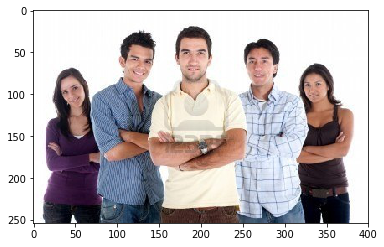

In [6]:
imgplot = plt.imshow(img)

In [7]:
imgs = []

for img_name in filter_prefix(root='img/', prefix=''):
    imgs.append(mpimg.imread('img/%s' % img_name))

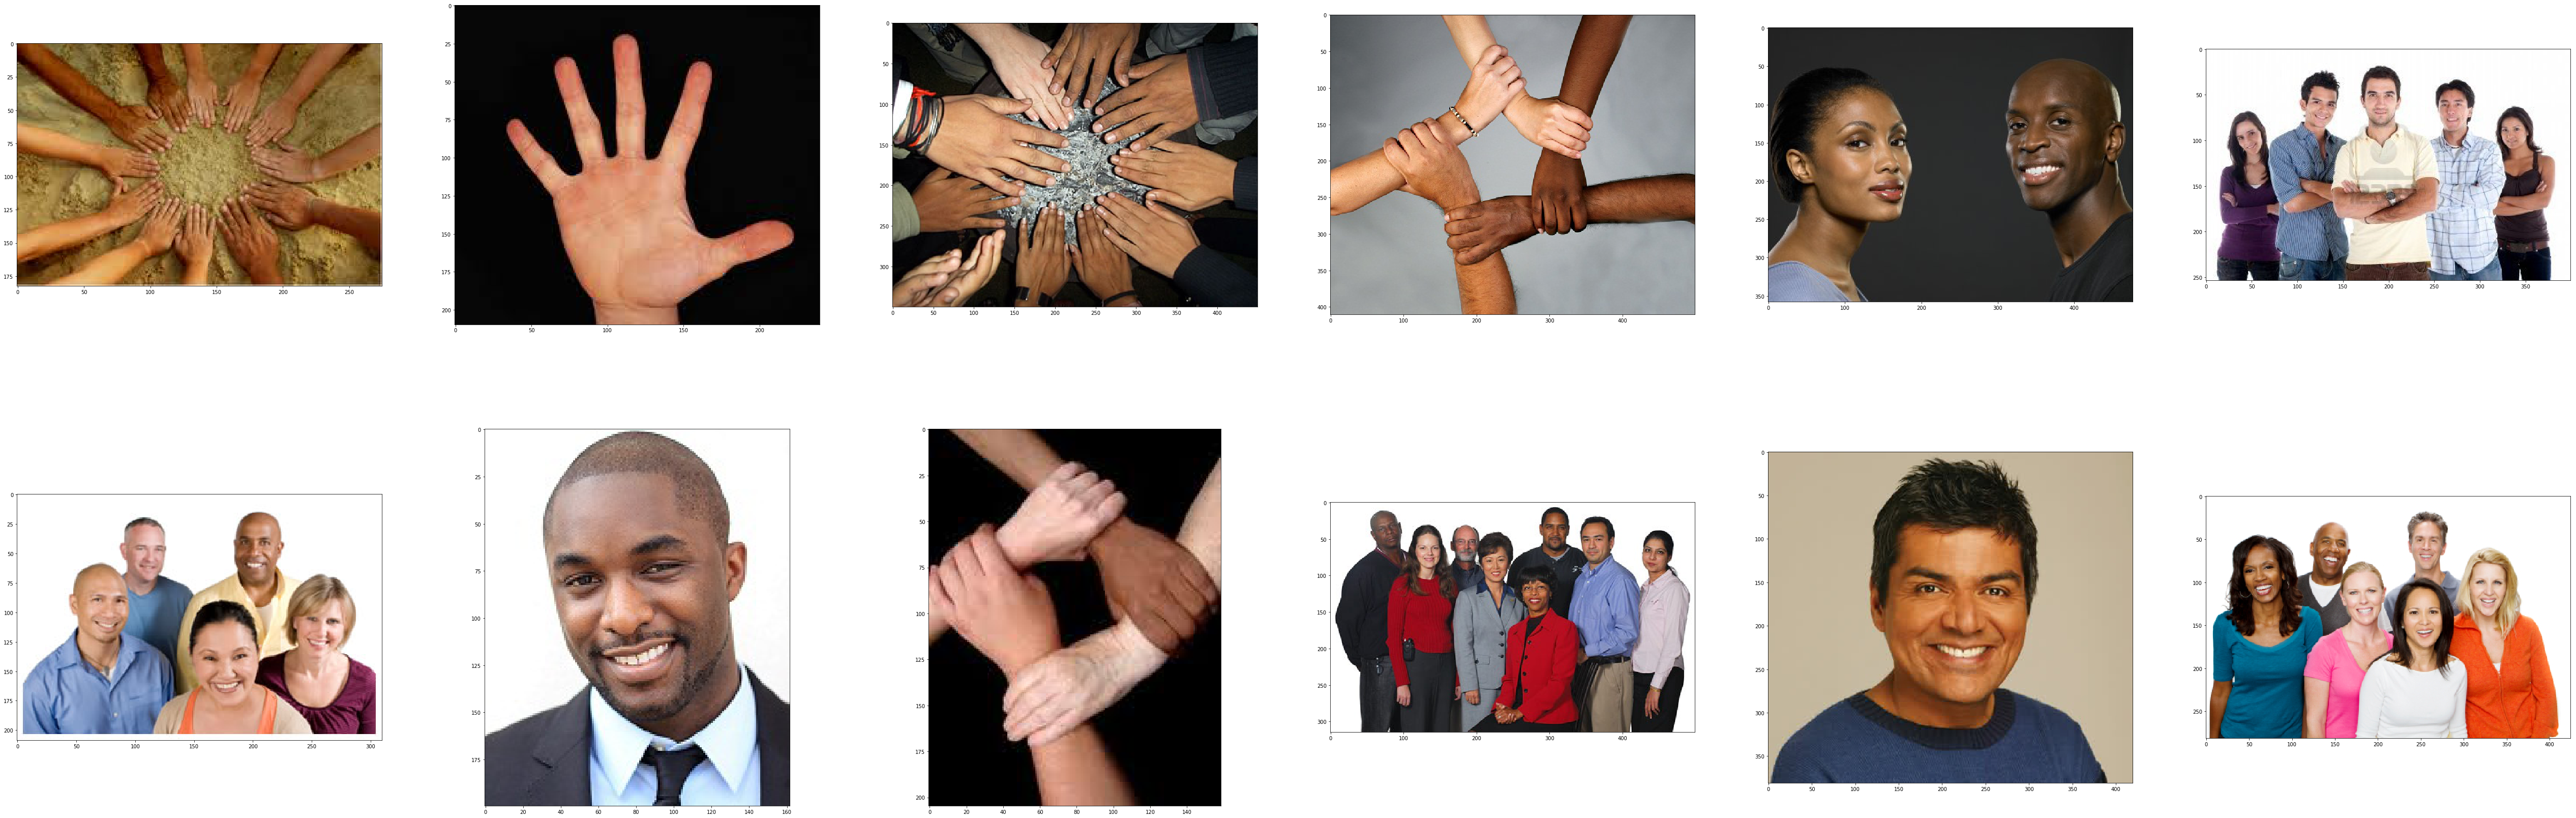

In [8]:
plt.figure(figsize=(90,30))

for i in range(len(imgs)):
    ax = plt.subplot(2, len(imgs)/2, i + 1)
    plt.imshow(imgs[i]) #.reshape(100,100))
    plt.gray()
    
plt.show()

# Skin detection

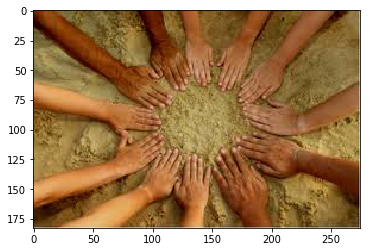

In [9]:
imgplot = plt.imshow(imgs[0])

In [10]:
print(imgs[0][0,0])
print(imgs[0][0,0][0], imgs[0][0,0][1], imgs[0][0,0][2])

[103  43   0]
103 43 0


In [11]:
def detect_skin_pixel(pixel):
    R = pixel[0]
    G = pixel[1]
    B = pixel[2]
    
    if R > 95 and G > 40 and B > 20 and \
        (max(R,G,B) - min(R,G,B) > 15) and \
        abs(R - G) > 15 and R > G and R > B:
            return 1
    elif R / G > 1.185 and \
         (R * B / (R + G + B) ** 2) > 0.107 and \
         (R * G / (R + G + B) ** 2) > 0.112:
            return 1
    
    return 0

In [12]:
%%time

temp_imgs = []
for i in range(len(imgs)):
    temp_imgs.append(np.copy(imgs[i]))

for k in range(len(temp_imgs)):
    temp_img = temp_imgs[k]
    
    for i in range(temp_img.shape[0]):
        for j in range(temp_img.shape[1]):
            # print(imgs[0][0,i])
            if detect_skin_pixel(temp_img[i, j]):
                temp_img[i, j] = np.array([255, 255, 255])
            else:
                temp_img[i, j] = np.array([0, 0, 0])
    
    temp_imgs[k] = temp_img

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in ubyte_scalars
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in ubyte_scalars
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


CPU times: user 12 s, sys: 150 ms, total: 12.1 s
Wall time: 12.1 s


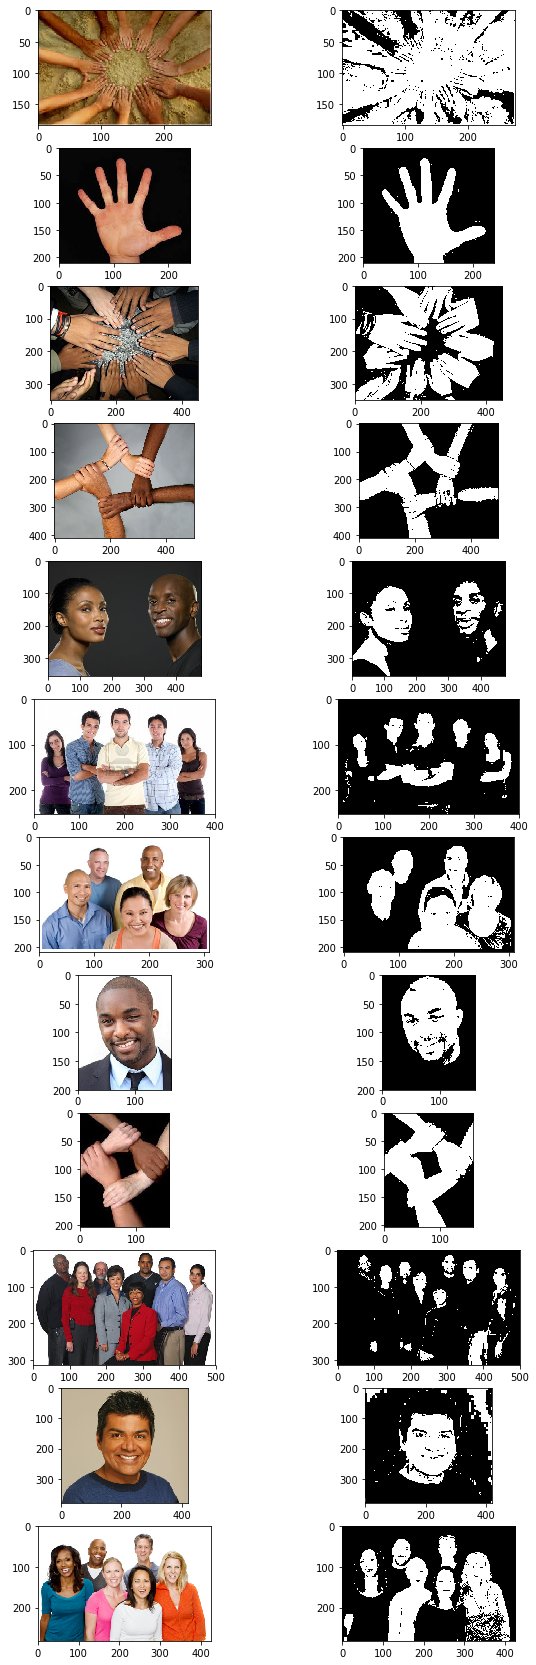

In [13]:
plt.figure(figsize=(10,30))

cnt = 1
for i in range(len(temp_imgs)):
    plt.subplot(len(temp_imgs), 2, cnt),
    plt.imshow(imgs[i])

    plt.subplot(len(temp_imgs), 2, cnt + 1),
    plt.imshow(temp_imgs[i])
    
    cnt += 2

plt.show()

# Convex Hull on preprocessed image

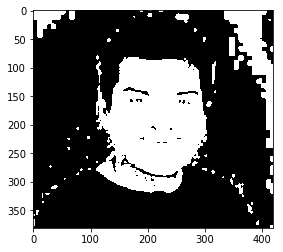

In [41]:
src = temp_imgs[10]

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY) # convert to grayscale
blur = cv2.blur(gray, (3, 3)) # blur the image
ret, thresh = cv2.threshold(blur, 50, 255, cv2.THRESH_BINARY)

plt.imshow(thresh)
plt.show()

In [42]:
# contour finder
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [43]:
# create hull array for convex hull points
hull = []
 
# calculate points for each contour
for i in range(len(contours)):
    # creating convex hull object for each contour
    hull.append(cv2.convexHull(contours[i], False))

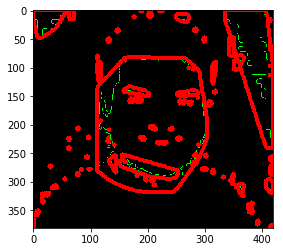

In [44]:
# create an empty black image
im = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)
 
# draw contours and hull points
for i in range(len(contours)):
    color_contours = (0, 255, 0) # green - color for contours
    color = (255, 0, 0) # blue - color for convex hull
    # draw ith contour
    cv2.drawContours(im, contours, i, color_contours, 1, 8, hierarchy)
    # draw ith convex hull object
    cv2.drawContours(im, hull, i, color, 5, 8)

# cv2.imshow("Keypoints", im)
# # cv2.waitKey(0)
# cv2.waitKey()
# cv2.destroyAllWindows()

plt.imshow(im)
plt.show()

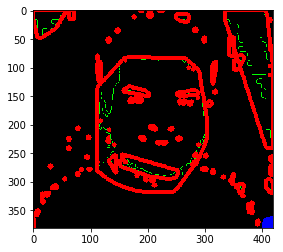

In [45]:
rect = cv2.minAreaRect(contours[0])
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(im,[box],0,(0,0,255),30)

plt.imshow(im)
plt.show()

# Convex hull on image after threshold

In [32]:
src = cv2.imread('img/2.jpg', 1)
# plt.imshow(src, 'gray')

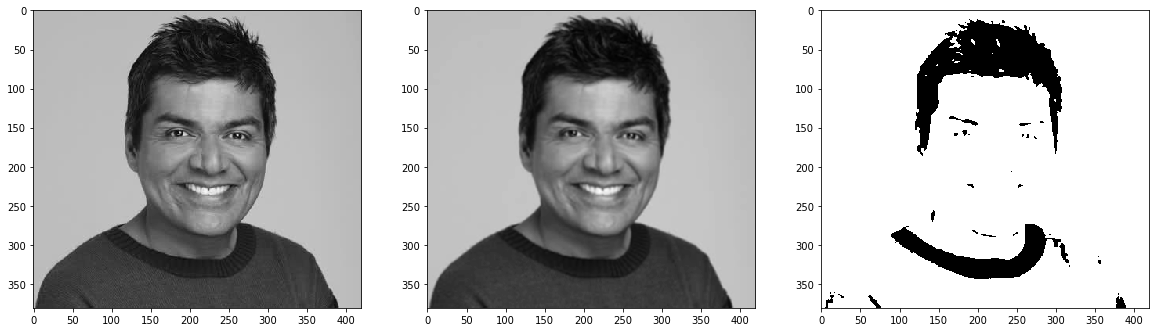

In [35]:
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY) # convert to grayscale
blur = cv2.blur(gray, (3, 3)) # blur the image
ret, thresh = cv2.threshold(blur, 50, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(20,20))

plt.subplot(1,3,1),
plt.imshow(gray)

plt.subplot(1,3,2),
plt.imshow(blur)

plt.subplot(1,3,3),
plt.imshow(thresh)

In [17]:
# contour finder
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [18]:
# create hull array for convex hull points
hull = []
 
# calculate points for each contour
for i in range(len(contours)):
    # creating convex hull object for each contour
    hull.append(cv2.convexHull(contours[i], False))

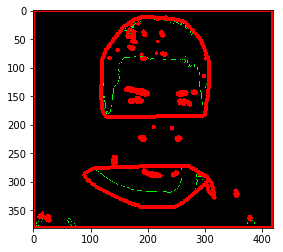

In [19]:
# create an empty black image
im = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)
 
# draw contours and hull points
for i in range(len(contours)):
    color_contours = (0, 255, 0) # green - color for contours
    color = (255, 0, 0) # blue - color for convex hull
    # draw ith contour
    cv2.drawContours(im, contours, i, color_contours, 1, 8, hierarchy)
    # draw ith convex hull object
    cv2.drawContours(im, hull, i, color, 5, 8)

# cv2.imshow("Keypoints", im)
# # cv2.waitKey(0)
# cv2.waitKey()
# cv2.destroyAllWindows()

plt.imshow(im)
plt.show()

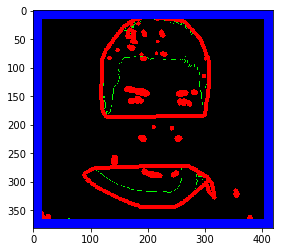

In [20]:
rect = cv2.minAreaRect(contours[0])
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(im,[box],0,(0,0,255),30)

plt.imshow(im)
plt.show()

# Bboxing - another approach

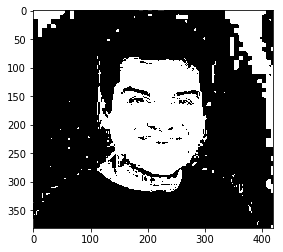

In [22]:
img = temp_imgs[10]

plt.imshow(temp_imgs[10])
plt.show()

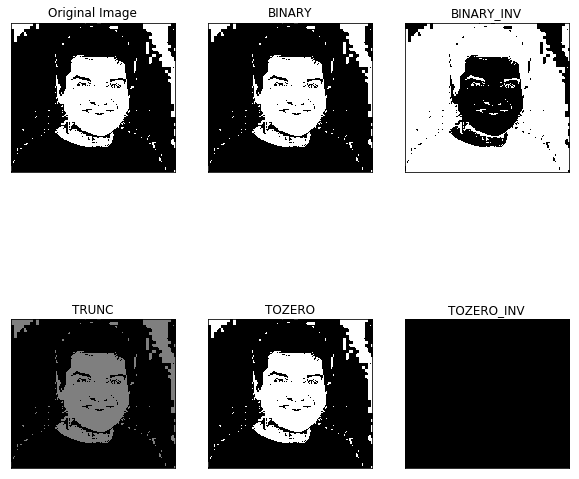

In [26]:
plt.figure(figsize=(10,10))

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

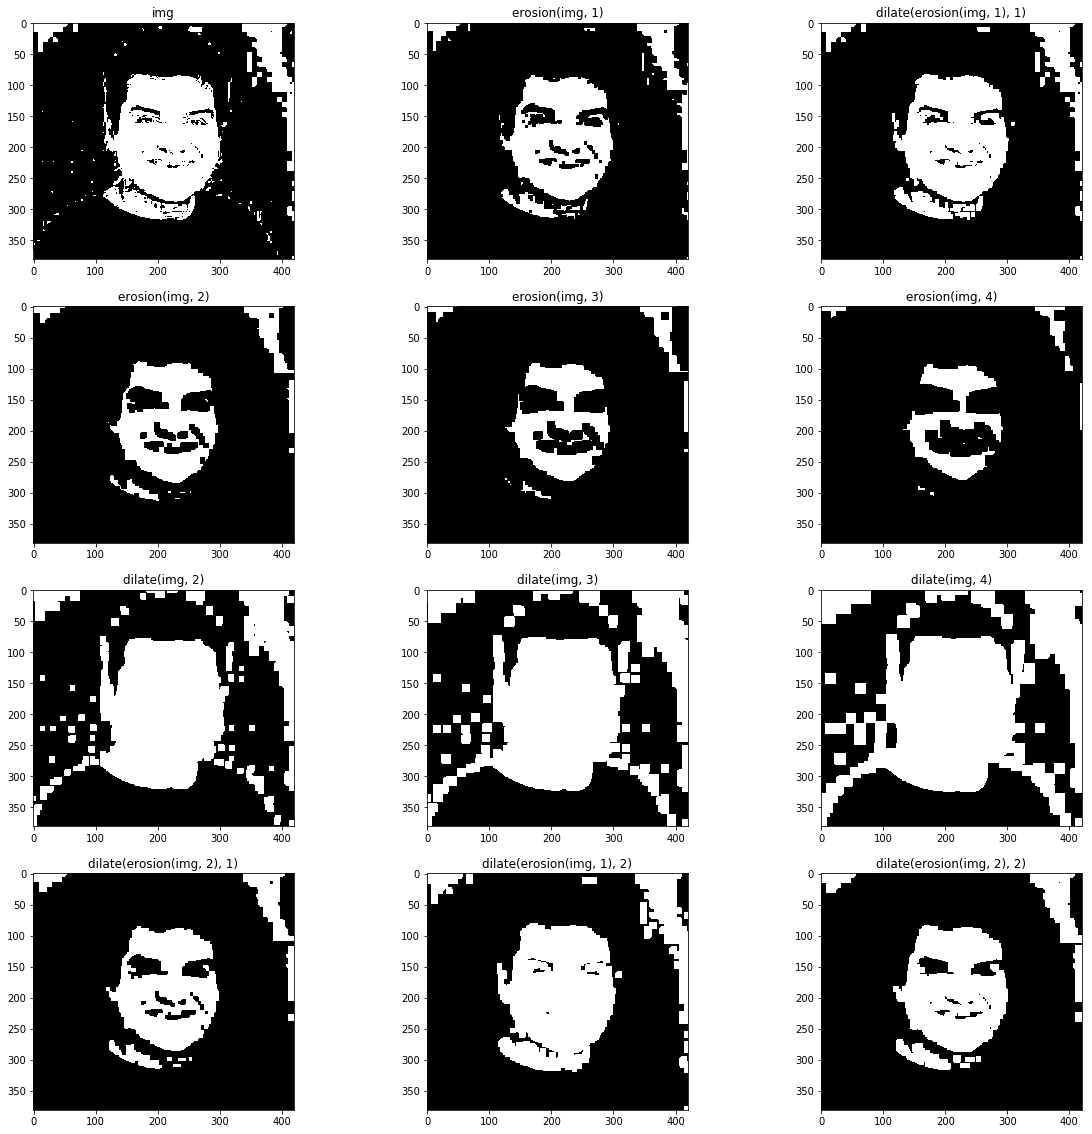

In [55]:
plt.figure(figsize=(20,20))


kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
dilation = cv2.dilate(erosion,kernel,iterations = 1)


plt.subplot(4,3,1),
plt.imshow(img),
plt.title('img')

plt.subplot(4,3,2),
plt.imshow(erosion),
plt.title('erosion(img, 1)')

plt.subplot(4,3,3),
plt.imshow(dilation),
plt.title('dilate(erosion(img, 1), 1)')



erosion2 = cv2.erode(img,kernel,iterations = 2)
erosion3 = cv2.erode(img,kernel,iterations = 3)
erosion4 = cv2.erode(img,kernel,iterations = 4)

plt.subplot(4,3,4),
plt.imshow(erosion2),
plt.title('erosion(img, 2)')

plt.subplot(4,3,5),
plt.imshow(erosion3),
plt.title('erosion(img, 3)')

plt.subplot(4,3,6),
plt.imshow(erosion4),
plt.title('erosion(img, 4)')


dilation2 = cv2.dilate(img,kernel,iterations = 2)
dilation3 = cv2.dilate(img,kernel,iterations = 3)
dilation4 = cv2.dilate(img,kernel,iterations = 4)

plt.subplot(4,3,7),
plt.imshow(dilation2),
plt.title('dilate(img, 2)')

plt.subplot(4,3,8),
plt.imshow(dilation3),
plt.title('dilate(img, 3)')

plt.subplot(4,3,9),
plt.imshow(dilation4),
plt.title('dilate(img, 4)')


dil_1_ero_2 = cv2.dilate(
    cv2.erode(img,kernel,iterations = 2)
    ,kernel,iterations = 1
)
dil_2_ero_1 = cv2.dilate(
    cv2.erode(img,kernel,iterations = 1)
    ,kernel,iterations = 2
)
dil_2_ero_2 = cv2.dilate(
    cv2.erode(img,kernel,iterations = 2)
    ,kernel,iterations = 2
)
plt.subplot(4,3,10),
plt.imshow(dil_1_ero_2),
plt.title('dilate(erosion(img, 2), 1)')

plt.subplot(4,3,11),
plt.imshow(dil_2_ero_1),
plt.title('dilate(erosion(img, 1), 2)')

plt.subplot(4,3,12),
plt.imshow(dil_2_ero_2),
plt.title('dilate(erosion(img, 2), 2)')

---

# Bibliography


+ https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html



---